In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv("202405-Cyclistic.csv")

In [5]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 15
0,D995CE0A085D41F5,classic_bike,5/28/24 8:26,5/28/24 8:26,3,31,Southport Ave & Irving Park Rd,TA1309000043,Southport Ave & Irving Park Rd,TA1309000043,41.954177,-87.664358,41.954177,-87.664358,member,NaN
1,72CDF1E20D1D75E4,electric_bike,5/31/24 14:44,5/31/24 14:45,6,31,Southport Ave & Roscoe St,13071,N Southport Ave & W Newport Ave,20257,41.943700,-87.664074,41.944019,-87.663975,casual,NaN
2,1A3E74B710F87102,classic_bike,5/1/24 15:53,5/1/24 15:54,4,31,Cherry Ave & Blackhawk St,18069,Cherry Ave & Blackhawk St,18069,41.907221,-87.655618,41.907221,-87.655618,member,NaN
3,4FC3BE12A4608225,electric_bike,5/15/24 13:51,5/15/24 13:52,4,31,Kingsbury St & Kinzie St,KA1503000043,Kingsbury St & Kinzie St,KA1503000043,41.889166,-87.638472,41.889177,-87.638506,casual,NaN
4,1F15FB742DE49410,classic_bike,5/23/24 16:59,5/23/24 16:59,5,31,State St & Randolph St,TA1305000029,State St & Randolph St,TA1305000029,41.884621,-87.627834,41.884621,-87.627834,casual,NaN


In [7]:
import matplotlib.pyplot as plt

In [9]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [11]:
df1_weekday_count.head(14)

day_of_week  member_casual
4            member           72146
6            member           63031
5            member           61114
7            casual           49374
             member           49358
3            member           47124
2            member           42530
6            casual           38706
1            member           37305
             casual           33765
4            casual           32834
5            casual           28193
2            casual           23780
3            casual           19421
Name: count, dtype: int64

In [13]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,4,member,72146
1,6,member,63031
2,5,member,61114
3,7,casual,49374
4,7,member,49358
5,3,member,47124
6,2,member,42530
7,6,casual,38706
8,1,member,37305
9,1,casual,33765


In [15]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1,33765.0,37305.0
2,23780.0,42530.0
3,19421.0,47124.0
4,32834.0,72146.0
5,28193.0,61114.0
6,38706.0,63031.0
7,49374.0,49358.0


In [17]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

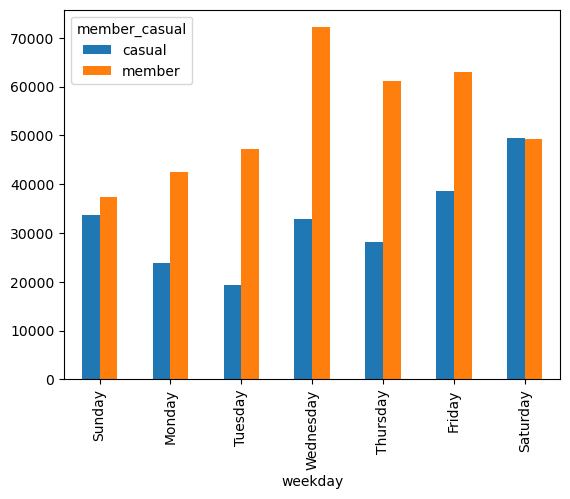

In [19]:
pivot_df1.plot(kind='bar' , x='weekday')

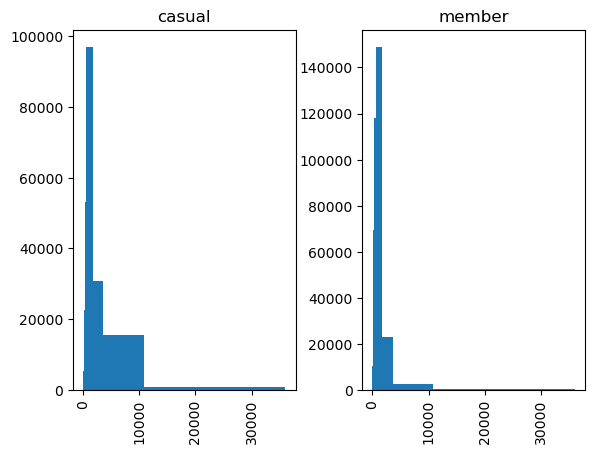

In [21]:
df1.hist(column='ride_length', bins=[30,120,300,600,1800,3600,10800,36000], by='member_casual')
plt.show()

In [23]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [25]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [27]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [29]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [31]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

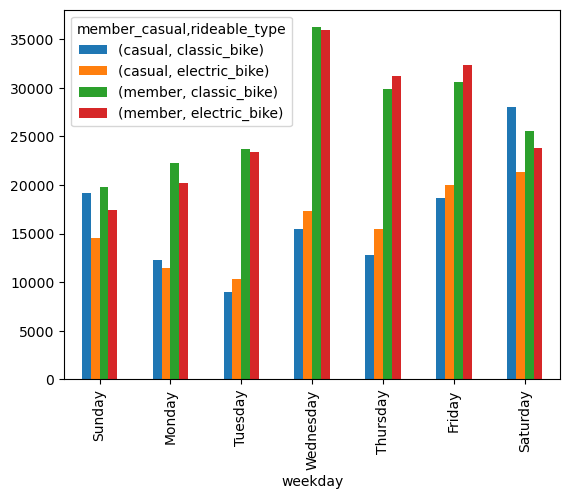

In [33]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [35]:
import folium

In [37]:
from folium.plugins import HeatMap

In [39]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [41]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [43]:
member_geo_data.head()

,start_lat,start_lng
0,41.954177,-87.664358
2,41.907221,-87.655618
5,41.888848,-87.627126
6,41.871808,-87.646580
7,41.802443,-87.586981


In [45]:
HeatMap(member_geo_data).add_to(m)

In [49]:
m.save('heatmapmember-May.html')

In [51]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [53]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [55]:
HeatMap(casual_geo_data).add_to(m1)

In [57]:
m1.save('heatmapcasual-May.html')

In [59]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [61]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
1,41.943700,-87.664074,41.944019,-87.663975
3,41.889166,-87.638472,41.889177,-87.638506
4,41.884621,-87.627834,41.884621,-87.627834
12,41.785130,-87.601109,41.790000,-87.600000
14,41.911768,-87.626849,41.911722,-87.626804


In [67]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m2)

In [69]:
m2.save('routesCasual-May.html')